# Loan Interest Rate Predictions
Winter 2024<br>
This code was originally used for Machine Learning I at the University of Chicago

In [1145]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1146]:
os.chdir('/Users/anasyquia/Downloads')
print(os.getcwd())

# Read in data
df = pd.read_csv('Assignment_3/Loan_Prediction/Data for Cleaning & Modeling.csv', low_memory=False)


/Users/anasyquia/Downloads


In [1147]:
print(df.shape)
print(df.isnull().sum())

(400000, 32)
X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276442
X17         1
X18        20
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64


In [1148]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [1149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123558 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399980 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

# Data Preprocessing

In [1150]:
# Name columns
# Clean
df.columns = ['Interest_Rate', 'Loan_ID', 'Borrower_ID', 'Loan_Requested', 'Loan_Funded', 'Investor_Portion',
              'Number_of_Payments', 'Loan_Grade', 'Loan_Subgrade', 'Job_Info', 'Years_Employed', 'Home_Ownership',
              'Annual_Income', 'Income_Verified', 'Date_Loan_Issue', 'Loan_Reason_Borrower', 'Loan_Category_Borrower',
              'Loan_Title_Borrower', 'Zip_3', 'State', 'Debt Ratio', 'Credit_Delinquencies', 'Date_Earliest_Credit',
              'Creditor_Inquiries_6_months', 'Months_Last_Delinquency', 'Months_Last_PR', 'Credit_Lines_Open',
              'Derogatory_PRs', 'Total_credit', 'Utilization_Rate', 'Credit_Lines_Total', 'Loan_Status']

In [1151]:
# Drop columns that we aren't using for our final model
df = df.drop(['Loan_ID', 'Borrower_ID', 'Job_Info', 'Loan_Reason_Borrower', 'Loan_Category_Borrower', 'Loan_Title_Borrower', 'Zip_3', 'State'], axis=1)

In [1152]:
df.head()

,Interest_Rate,Loan_Requested,Loan_Funded,Investor_Portion,Number_of_Payments,Loan_Grade,Loan_Subgrade,Years_Employed,Home_Ownership,Annual_Income,...,Date_Earliest_Credit,Creditor_Inquiries_6_months,Months_Last_Delinquency,Months_Last_PR,Credit_Lines_Open,Derogatory_PRs,Total_credit,Utilization_Rate,Credit_Lines_Total,Loan_Status
0,11.89%,"$25,000","$25,000","$19,080",36 months,B,B4,< 1 year,RENT,85000.0,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,"$7,000","$7,000",$673,36 months,B,B5,< 1 year,RENT,65000.0,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,"$25,000","$25,000","$24,725",36 months,D,D3,1 year,RENT,70000.0,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,"$1,200","$1,200","$1,200",36 months,C,C2,10+ years,OWN,54000.0,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,"$10,800","$10,800","$10,692",36 months,C,C3,6 years,RENT,32000.0,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


## Reformat for Numeric Columns

In [1153]:
# Reformat
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'].astype(str).str.rstrip('%'), errors='coerce')
df = df.dropna(subset=['Interest_Rate'])

# Remove '$' and ',' from the relevant columns
df[['Loan_Requested', 'Loan_Funded', 'Investor_Portion']] = df[['Loan_Requested', 'Loan_Funded', 'Investor_Portion']] \
    .apply(lambda x: x.astype(str).str.replace('$', '').str.replace(',', ''))

# Convert each column to numeric, handling errors with 'coerce'
df[['Loan_Requested', 'Loan_Funded', 'Investor_Portion']] = df[['Loan_Requested', 'Loan_Funded', 'Investor_Portion']].apply(pd.to_numeric, errors='coerce')

# Remove months
df['Number_of_Payments'] = pd.to_numeric(df['Number_of_Payments'].astype(str).str.rstrip(' months'), errors='coerce')
df.head()

df['Years_Employed'] = pd.to_numeric(df['Years_Employed'].astype(str).str.replace(r'\D', '', regex=True), errors='coerce')
df.head()

df['Utilization_Rate'] = pd.to_numeric(df['Utilization_Rate'].astype(str).str.rstrip('%'), errors='coerce')

In [1154]:
print(df.shape)
df.head()

(338990, 24)


,Interest_Rate,Loan_Requested,Loan_Funded,Investor_Portion,Number_of_Payments,Loan_Grade,Loan_Subgrade,Years_Employed,Home_Ownership,Annual_Income,...,Date_Earliest_Credit,Creditor_Inquiries_6_months,Months_Last_Delinquency,Months_Last_PR,Credit_Lines_Open,Derogatory_PRs,Total_credit,Utilization_Rate,Credit_Lines_Total,Loan_Status
0,11.89,25000.0,25000.0,19080.0,36.0,B,B4,1.0,RENT,85000.0,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.1,42.0,f
1,10.71,7000.0,7000.0,673.0,36.0,B,B5,1.0,RENT,65000.0,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.7,7.0,f
2,16.99,25000.0,25000.0,24725.0,36.0,D,D3,1.0,RENT,70000.0,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.3,17.0,f
3,13.11,1200.0,1200.0,1200.0,36.0,C,C2,10.0,OWN,54000.0,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.4,31.0,f
4,13.57,10800.0,10800.0,10692.0,36.0,C,C3,6.0,RENT,32000.0,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.6,40.0,f


# EDA & Feature Engineering

In [1155]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_cols)
print(len(numeric_cols))

Numeric Columns: Index(['Interest_Rate', 'Loan_Requested', 'Loan_Funded', 'Investor_Portion',
       'Number_of_Payments', 'Years_Employed', 'Annual_Income', 'Debt Ratio',
       'Credit_Delinquencies', 'Creditor_Inquiries_6_months',
       'Months_Last_Delinquency', 'Months_Last_PR', 'Credit_Lines_Open',
       'Derogatory_PRs', 'Total_credit', 'Utilization_Rate',
       'Credit_Lines_Total'],
      dtype='object')
17


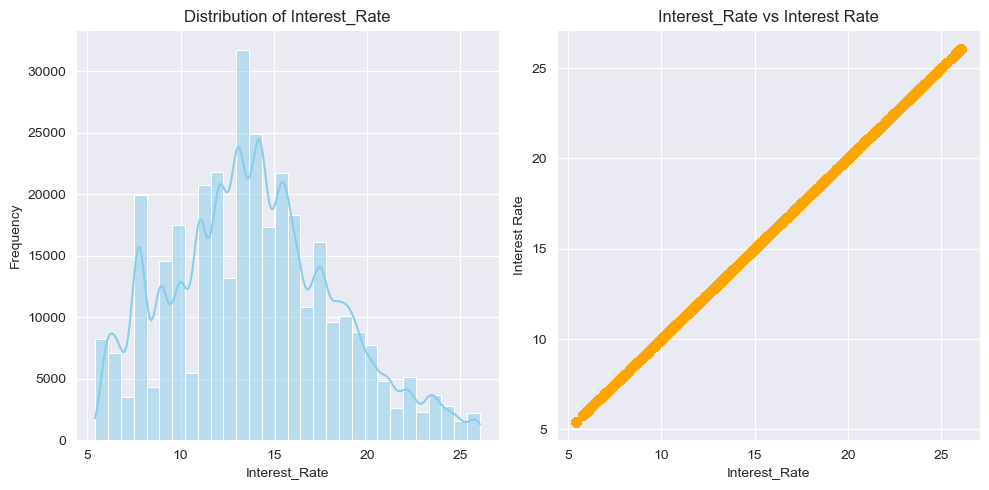

Missing values in Interest_Rate: 0


count    338990.000000
mean         13.946271
std           4.377951
min           5.420000
25%          10.990000
50%          13.680000
75%          16.780000
max          26.060000
Name: Interest_Rate, dtype: float64

In [1156]:
column = numeric_cols[0]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
df[column].describe()


In [1157]:
##### df.drop(index=364111, inplace=True)
# had most values as NaN?

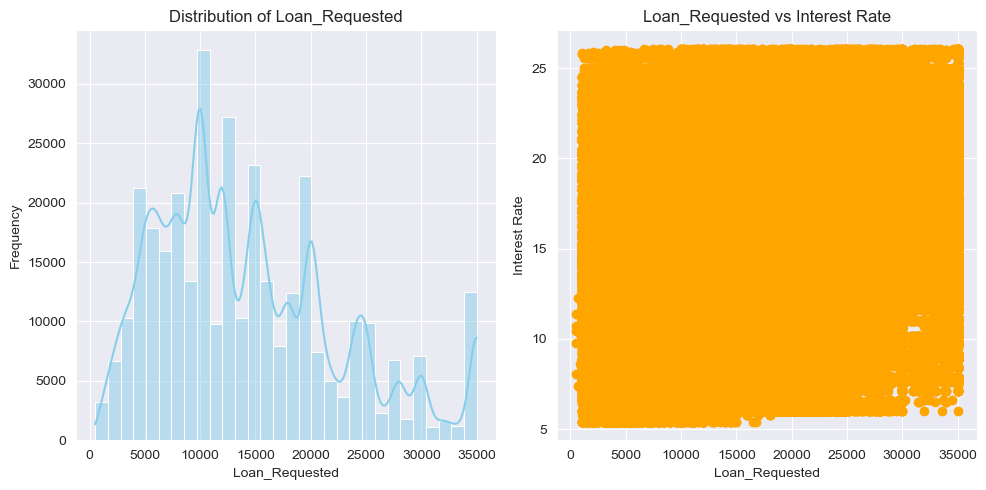

Missing values in Loan_Requested: 1


count    338989.000000
mean      14276.968353
std        8252.264104
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: Loan_Requested, dtype: float64

In [1158]:
# Loan Requested
column = numeric_cols[1]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
df[column].describe()

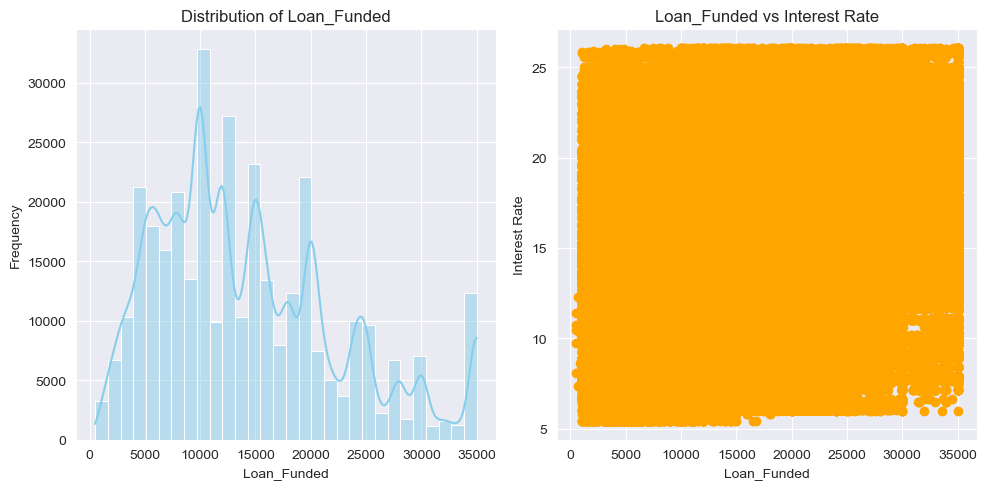

Missing values in Loan_Funded: 1


count    338989.000000
mean      14248.306140
std        8238.064335
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: Loan_Funded, dtype: float64

In [1159]:
# Loan Funded
column = numeric_cols[2]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
df[column].describe()

In [1160]:
# Loan Requested and Loan Funded are the same, drop one
df = df.drop(['Loan_Requested'], axis=1)

In [1161]:
# Fill NAs with median
df['Loan_Funded'] = df['Loan_Funded'].fillna(df['Loan_Funded'].median())

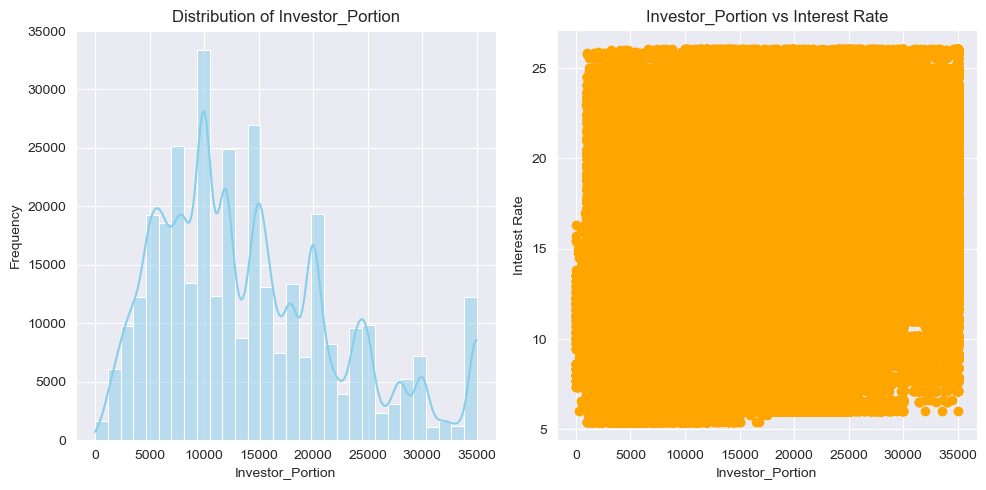

Missing values in Investor_Portion: 1


count    338989.000000
mean      14182.000445
std        8255.138412
min           0.000000
25%        8000.000000
50%       12000.000000
75%       19900.000000
max       35000.000000
Name: Investor_Portion, dtype: float64

In [1162]:
# Investor Portion
column = numeric_cols[3]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
df[column].describe()

In [1163]:
# Drop one since redundant
df = df.drop(['Investor_Portion'], axis=1)

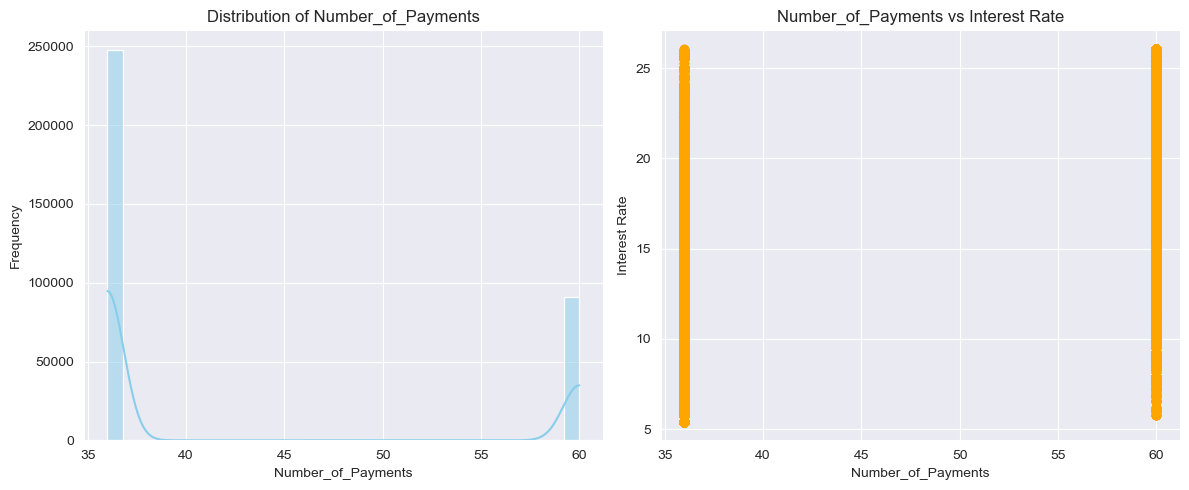

Missing values in Number_of_Payments: 1


count    338989.000000
mean         42.456705
std          10.642942
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: Number_of_Payments, dtype: float64

In [1164]:
column = numeric_cols[4]

# Create subplots: 1 row, 2 columns for the graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
df[column].describe()


In [1165]:
print(df['Number_of_Payments'].value_counts(dropna=False))


Number_of_Payments
36.0    247791
60.0     91198
NaN          1
Name: count, dtype: int64


In [1166]:
df.groupby('Number_of_Payments')['Loan_Funded'].describe()


,count,mean,std,min,25%,50%,75%,max
Number_of_Payments,,,,,,,,
36.0,247791.0,12205.265324,7473.427120,500.0,6625.0,10000.0,16000.0,35000.0
60.0,91198.0,19799.383210,7638.874279,1000.0,14075.0,19200.0,25000.0,35000.0


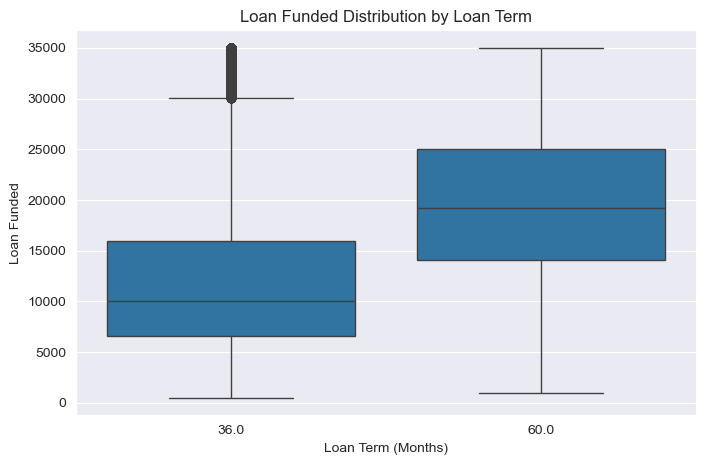

In [1167]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Number_of_Payments'], y=df['Loan_Funded'])
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Funded')
plt.title('Loan Funded Distribution by Loan Term')
plt.show()


In [1168]:
# Impute Number of Payments based on Loan Funded
df.loc[df['Loan_Funded'] < 15000, 'Number_of_Payments'] = df['Number_of_Payments'].fillna(36)
df.loc[df['Loan_Funded'] >= 15000, 'Number_of_Payments'] = df['Number_of_Payments'].fillna(60)

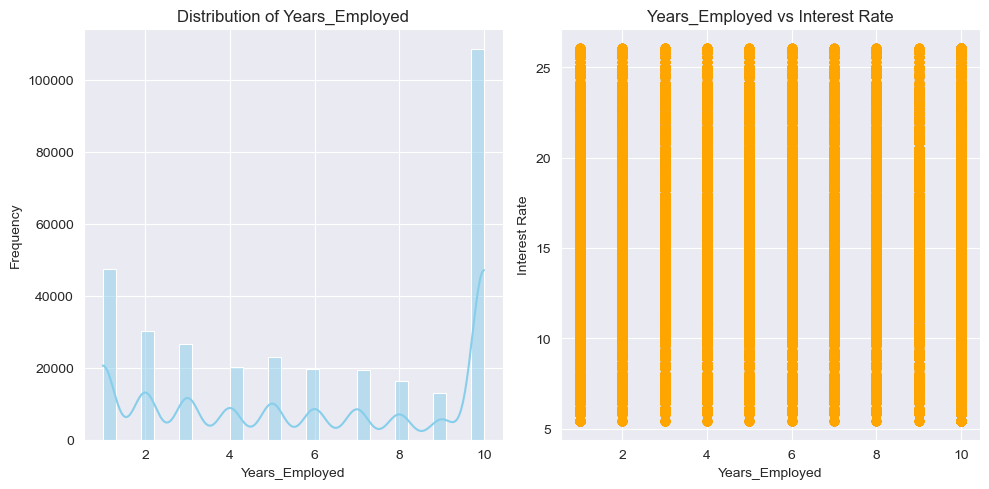

Missing values in Years_Employed: 14795


count    324195.000000
mean          6.071775
std           3.488977
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Years_Employed, dtype: float64

In [1169]:
# Years Employed
column = numeric_cols[5]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
df[column].describe()

In [1170]:
df[['Years_Employed', 'Interest_Rate']].corr()

,Years_Employed,Interest_Rate
Years_Employed,1.000000,0.039823
Interest_Rate,0.039823,1.000000


In [1171]:
df = df.drop(['Years_Employed'], axis=1)

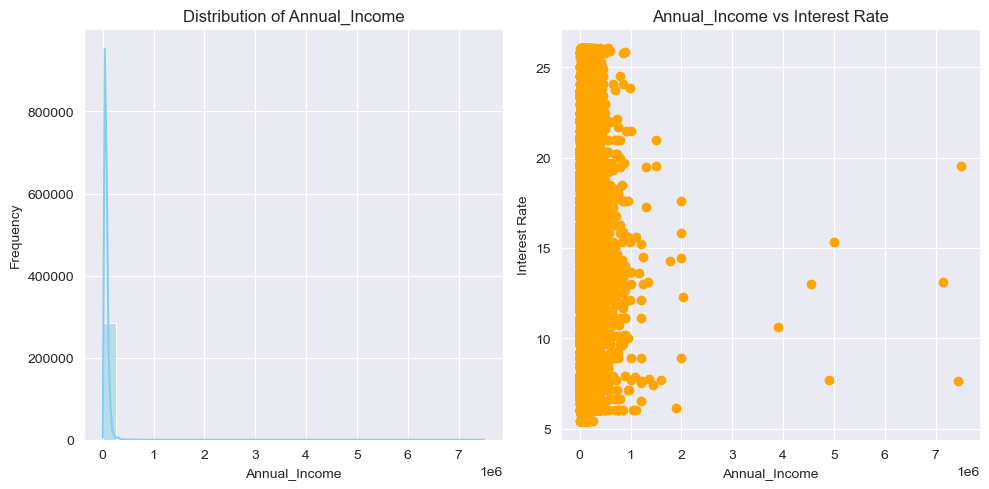

Missing values in Annual_Income: 51752
(338990, 21)


count    2.872380e+05
mean     7.315146e+04
std      5.618967e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.807875e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [1172]:
# Annual Income
column = numeric_cols[6]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

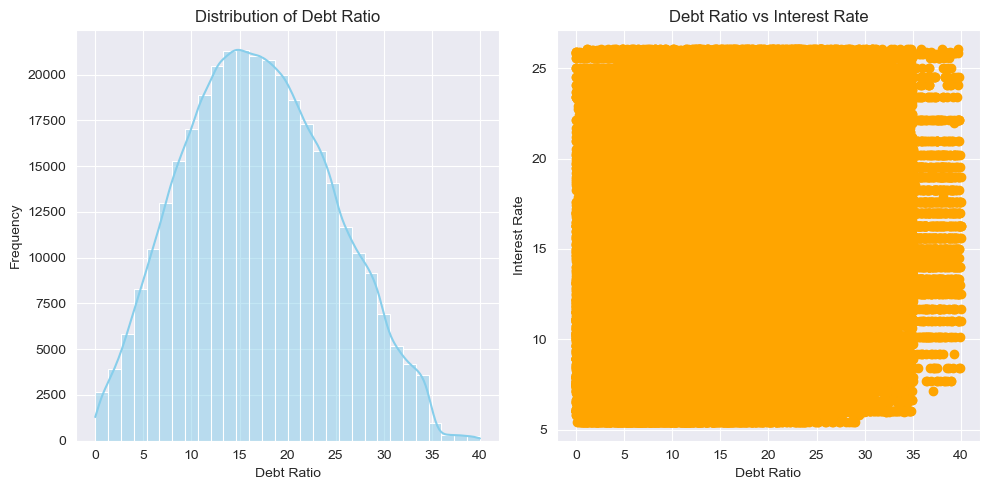

Missing values in Debt Ratio: 1
(338990, 21)


count    338989.000000
mean         16.997242
std           7.697223
min           0.000000
25%          11.250000
50%          16.700000
75%          22.500000
max          39.990000
Name: Debt Ratio, dtype: float64

In [1173]:
# Debt Ratio
column = numeric_cols[7]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

In [1174]:
# Debt ratio should be correlated with Annual Income since divided by
df = df.drop(['Annual_Income'], axis=1)

In [1175]:
# Fill NAs with median
df['Debt Ratio'] = df['Debt Ratio'].fillna(df['Debt Ratio'].median())

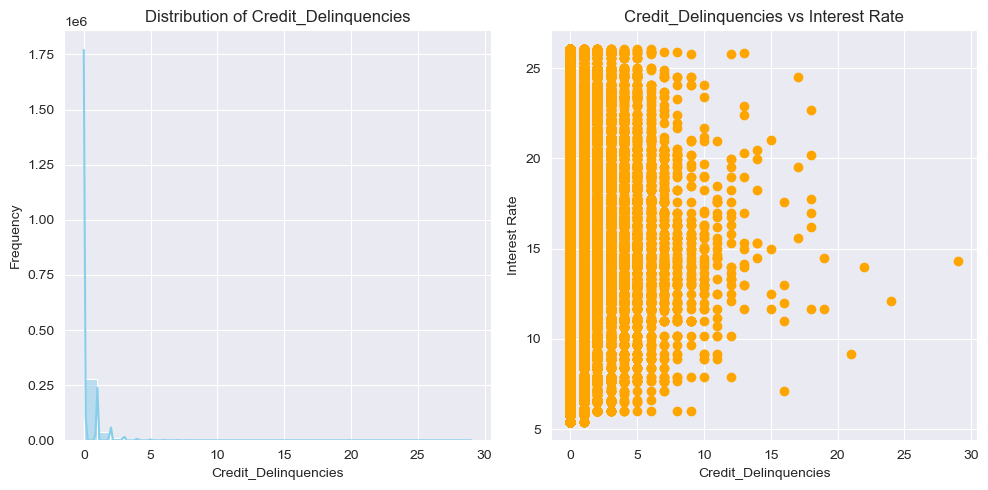

Missing values in Credit_Delinquencies: 1
(338990, 20)


count    338989.000000
mean          0.274286
std           0.779294
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: Credit_Delinquencies, dtype: float64

In [1176]:
# Credit Delinquencies
column = numeric_cols[8]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

In [1177]:
# MOSTLY ZEROS
df['Credit_Delinquencies'] = df['Credit_Delinquencies'].fillna(0)

In [1178]:
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

print("Original Skewness:", skew(df['Credit_Delinquencies']))
print("Log(1+x) Skewness:", skew(np.log1p(df['Credit_Delinquencies'])))

Original Skewness: 5.466883872340304
Log(1+x) Skewness: 2.4513971658840163


In [1179]:
# Lets use this one
df['Credit_Delinquencies_log'] = np.log1p(df['Credit_Delinquencies'])
df = df.drop(['Credit_Delinquencies'], axis=1)

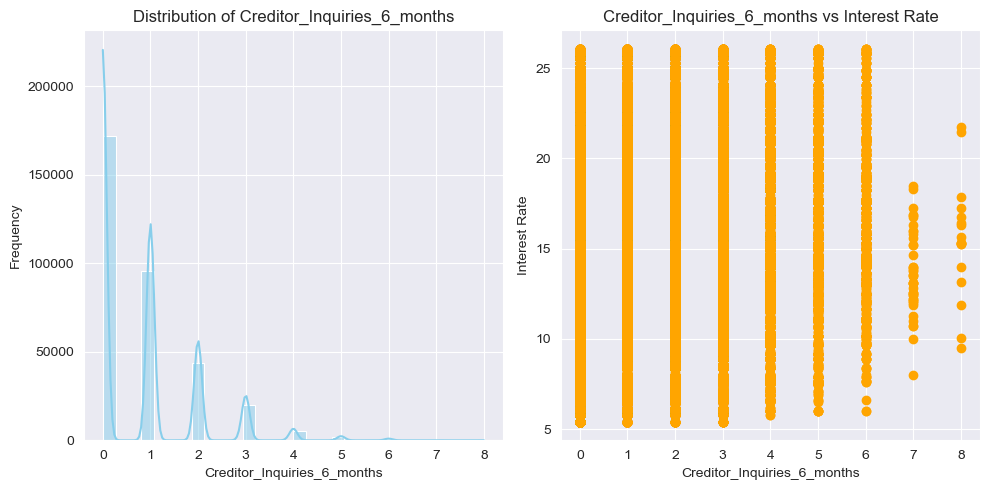

Missing values in Creditor_Inquiries_6_months: 1
(338990, 20)


count    338989.000000
mean          0.817911
std           1.059264
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: Creditor_Inquiries_6_months, dtype: float64

In [1180]:
# Creditor Inquiries in the last 6 months
column = numeric_cols[9]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

In [1181]:
# MOSTLY ZEROS
df['Creditor_Inquiries_6_months'] = df['Creditor_Inquiries_6_months'].fillna(0)

In [1182]:
print("Original Skewness:", skew(df['Creditor_Inquiries_6_months']))
print("Log(1+x) Skewness:", skew(np.log1p(df['Creditor_Inquiries_6_months'])))
print("Reciprocal Skewness:", skew(1 / (df['Creditor_Inquiries_6_months'] + 1)))

Original Skewness: 1.4986933240560374
Log(1+x) Skewness: 0.6036006460867576
Reciprocal Skewness: -0.2237281295791194


In [1183]:
# Lets use this one
df['Credit_Inquiries_rcp'] = 1 / (df['Creditor_Inquiries_6_months'] + 1)
df = df.drop(['Creditor_Inquiries_6_months'], axis=1)

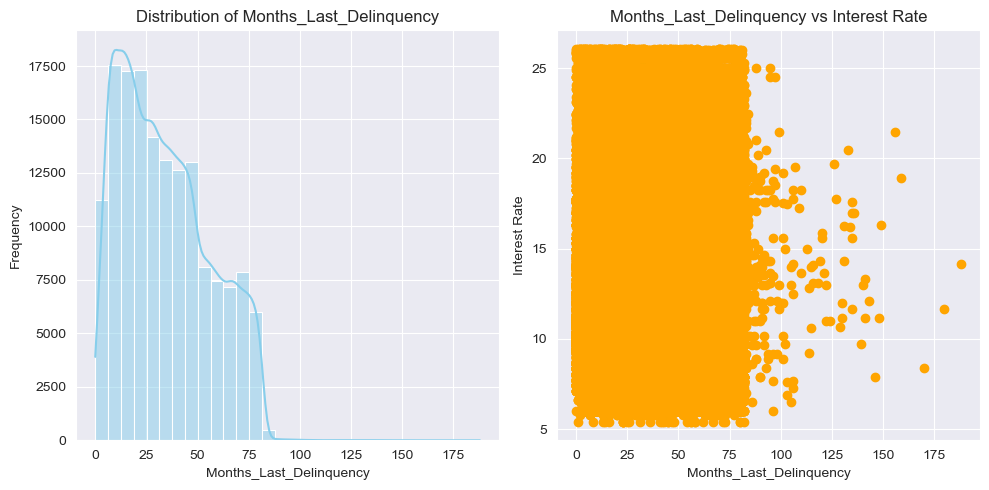

Missing values in Months_Last_Delinquency: 185457
(338990, 20)


count    153533.000000
mean         34.325787
std          21.788655
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         188.000000
Name: Months_Last_Delinquency, dtype: float64

In [1184]:
# Months since last delinquency
column = numeric_cols[10]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

In [1185]:
# A lot missing lets drop, same with next one
df = df.drop(['Months_Last_Delinquency'], axis=1)

In [1186]:
df = df.drop(['Months_Last_PR'], axis=1)

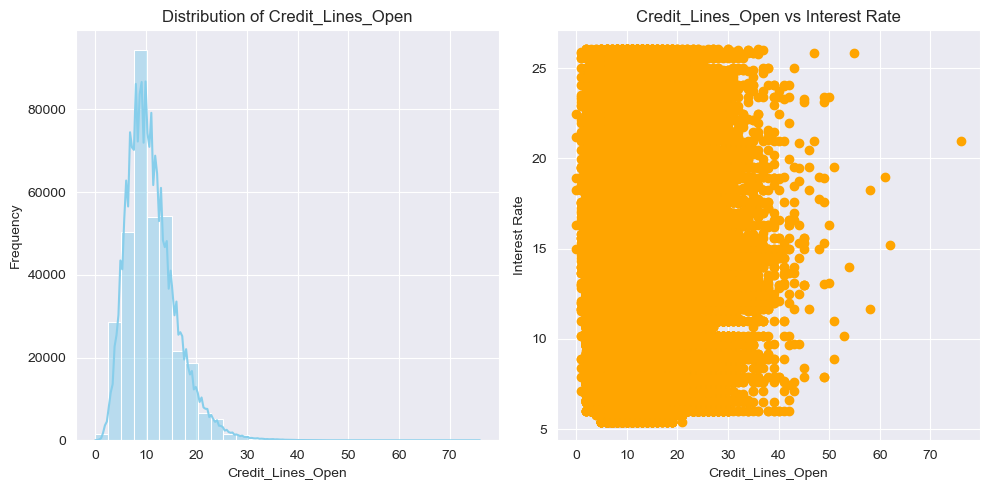

Missing values in Credit_Lines_Open: 1
(338990, 18)


count    338989.000000
mean         11.118081
std           4.896081
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          76.000000
Name: Credit_Lines_Open, dtype: float64

In [1187]:
# Credit Lines Open
column = numeric_cols[12]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

In [1188]:
# Fill NAs with median
df['Credit_Lines_Open'] = df['Credit_Lines_Open'].fillna(df['Credit_Lines_Open'].median())

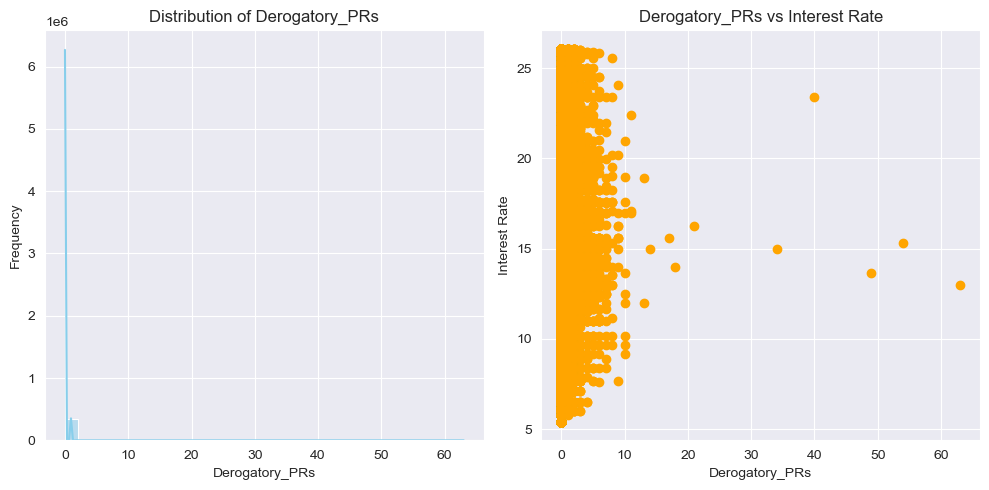

Missing values in Derogatory_PRs: 1
(338990, 18)


count    338989.000000
mean          0.152689
std           0.505363
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: Derogatory_PRs, dtype: float64

In [1189]:
# Derogatory PRs
column = numeric_cols[13]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

In [1190]:
# MOSTLY ZEROS
df['Derogatory_PRs'] = df['Derogatory_PRs'].fillna(0)

In [1191]:
# Remove outliers
# lower_percentile = df['Derogatory_PRs'].quantile(0.05)  # 5th percentile
upper_percentile_DPR = df['Derogatory_PRs'].quantile(0.99)  # 95th percentile

# df = df[(df['Derogatory_PRs'] <= upper_percentile_DPR)]
# Clip instead of remove
df["Derogatory_PRs"] = np.clip(df["Derogatory_PRs"], None, upper_percentile_DPR)
df['Derogatory_PRs'].describe()


count    338990.000000
mean          0.142267
std           0.392787
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Derogatory_PRs, dtype: float64

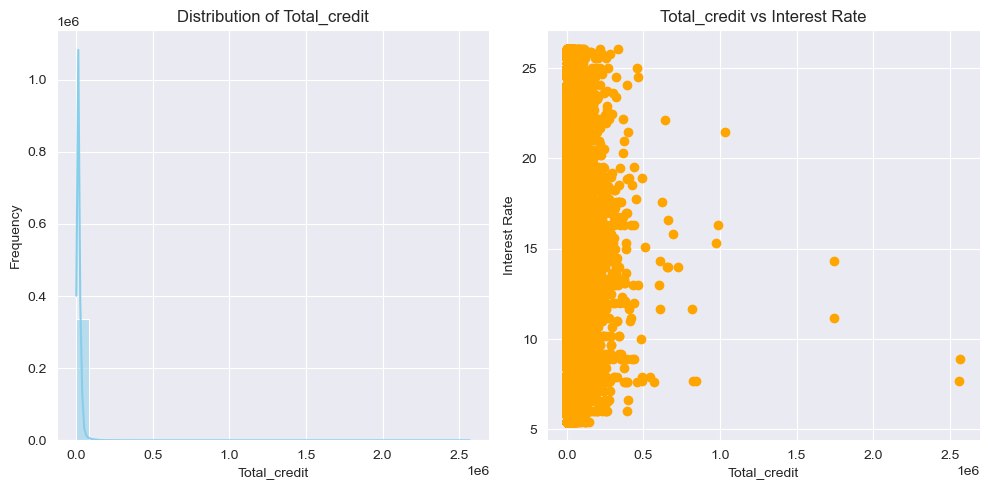

Missing values in Total_credit: 1
(338990, 18)


count    3.389890e+05
mean     1.597434e+04
std      1.976517e+04
min      0.000000e+00
25%      6.462000e+03
50%      1.178200e+04
75%      2.023300e+04
max      2.568995e+06
Name: Total_credit, dtype: float64

In [1192]:
# Total Credit
column = numeric_cols[14]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

In [1193]:
# Fill NAs with median
df['Total_credit'] = df['Total_credit'].fillna(df['Total_credit'].median())

<Axes: >

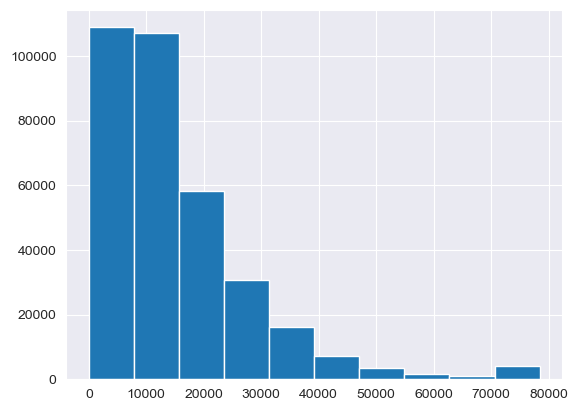

In [1194]:
# Remove outliers
# lower_percentile = df['Total_credit'].quantile(0.05)  # 5th percentile
upper_percentile_TC = df['Total_credit'].quantile(0.99)  # 99th percentile

# df = df[(df['Total_credit'] <= upper_percentile_TC)]
# Clip instead of remove
df["Total_credit"] = np.clip(df["Total_credit"], None, upper_percentile_TC)

df['Total_credit'].hist()

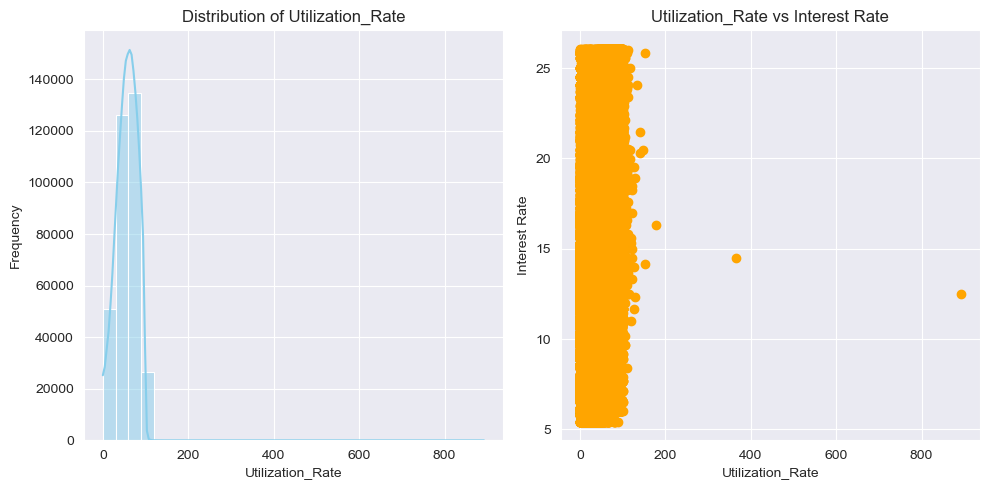

Missing values in Utilization_Rate: 225
(338990, 18)


count    338765.000000
mean         56.314158
std          23.754088
min           0.000000
25%          39.500000
50%          57.900000
75%          74.900000
max         892.300000
Name: Utilization_Rate, dtype: float64

In [1195]:
# Utilization Rate
column = numeric_cols[15]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

In [1196]:
df["Utilization_Rate"] = df["Utilization_Rate"].fillna(df["Utilization_Rate"].median())

<Axes: >

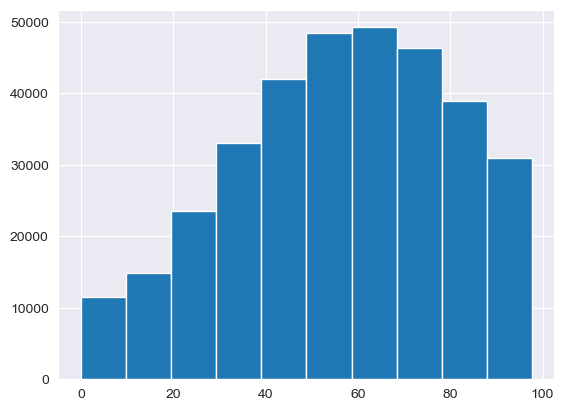

In [1197]:
# Remove outliers
# lower_percentile = df['Utilization_Rate'].quantile(0.025)  # 2.5th percentile
upper_percentile_UR = df['Utilization_Rate'].quantile(0.99)  # 99th percentile

# df = df[(df['Utilization_Rate'] >= lower_percentile) & (df['Utilization_Rate'] <= upper_percentile)]

# df = df[(df['Utilization_Rate'] <= upper_percentile_UR)]
# Clip instead of remove
df["Utilization_Rate"] = np.clip(df["Utilization_Rate"], None, upper_percentile_UR)

df['Utilization_Rate'].hist()

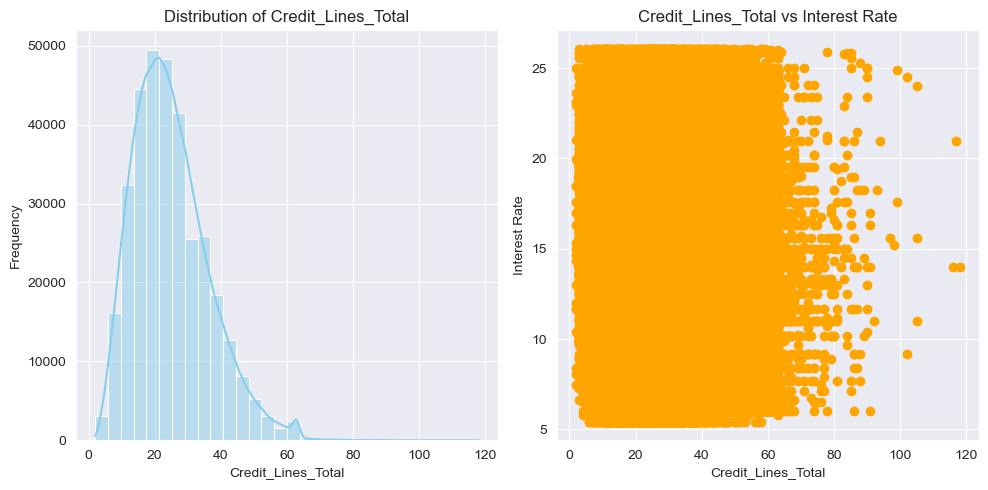

Missing values in Credit_Lines_Total: 1
(338990, 18)


count    338989.000000
mean         24.978309
std          11.471413
min           2.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         118.000000
Name: Credit_Lines_Total, dtype: float64

In [1198]:
# Credit Lines
column = numeric_cols[16]

# Create subplots: 1 rows, 2 column for the graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(df[column], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribution of {column}')
axes[0].set_xlabel(f'{column}')
axes[0].set_ylabel('Frequency')

# Plot the scatter plot of the column vs. Interest Rate on the second subplot
axes[1].scatter(df[column], df['Interest_Rate'], color='orange')
axes[1].set_title(f'{column} vs Interest Rate')
axes[1].set_xlabel(f'{column}')
axes[1].set_ylabel('Interest Rate')

# Show the plots
plt.tight_layout()
plt.show()

# Print missing values
missing_values = df[column].isna().sum()
print(f'Missing values in {column}: {missing_values}')
print(df.shape)
df[column].describe()

In [1199]:
# Fill NAs with median
df['Credit_Lines_Total'] = df['Credit_Lines_Total'].fillna(df['Credit_Lines_Total'].median())

In [1200]:
print(numeric_cols)

Index(['Interest_Rate', 'Loan_Requested', 'Loan_Funded', 'Investor_Portion',
       'Number_of_Payments', 'Years_Employed', 'Annual_Income', 'Debt Ratio',
       'Credit_Delinquencies', 'Creditor_Inquiries_6_months',
       'Months_Last_Delinquency', 'Months_Last_PR', 'Credit_Lines_Open',
       'Derogatory_PRs', 'Total_credit', 'Utilization_Rate',
       'Credit_Lines_Total'],
      dtype='object')


In [1201]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)


['Loan_Grade', 'Loan_Subgrade', 'Home_Ownership', 'Income_Verified', 'Date_Loan_Issue', 'Date_Earliest_Credit', 'Loan_Status']


In [1202]:
for col in categorical_cols:
    print(df[col].isna().sum())

51867
51867
51960
1
1
1
1


In [1203]:
df['Loan_Subgrade'].unique()

array(['B4', 'B5', 'D3', 'C2', 'C3', 'D4', 'B3', 'C5', 'A5', 'D2', 'B1',
       'C4', 'A4', 'A3', 'C1', 'E4', 'B2', 'A2', 'E2', 'E1', 'D1', 'F1',
       'F2', 'A1', 'F3', 'E5', 'D5', nan, 'E3', 'F4', 'G5', 'F5', 'G1',
       'G4', 'G3', 'G2'], dtype=object)

In [1204]:
print(df['Loan_Subgrade'].value_counts(dropna=False))


Loan_Subgrade
NaN    51867
B3     20352
B4     19137
B2     16767
C1     16342
C2     16310
B5     15521
C3     15425
C4     14646
B1     14344
C5     13723
A5     13086
A4     11806
D1     11720
D2     10498
D3      9091
D4      8573
A3      7653
D5      7102
A2      6496
A1      6484
E1      5447
E2      5246
E3      4230
E4      3640
E5      3065
F1      2490
F2      1873
F3      1712
F4      1331
F5       989
G1       677
G2       511
G3       378
G4       252
G5       206
Name: count, dtype: int64


In [1205]:
df['Loan_Grade_Missing'] = df['Loan_Grade'].isna().astype(int)
df.groupby('Loan_Grade_Missing')[['Loan_Funded', 'Interest_Rate', 'Debt Ratio']].mean()

,Loan_Funded,Interest_Rate,Debt Ratio
Loan_Grade_Missing,,,
0,14242.514793,13.944959,17.002384
1,14280.322267,13.953534,16.968772


In [1206]:
df = df.drop('Loan_Grade_Missing', axis=1)

In [1207]:
df['Loan_Grade'] = df['Loan_Grade'].fillna(df['Loan_Grade'].mode()[0])
# TESTING

In [1208]:
# df['Loan_Subgrade'].fillna('G4')  # CHANGE?

subgrade_order = [f"{grade}{num}" for grade in "ABCDEFG" for num in range(1, 6)]  # ['A1', 'A2', ..., 'G5']

# Convert to categorical and encode
df['Loan_Subgrade_ordinal'] = pd.Categorical(df['Loan_Subgrade'], categories=subgrade_order, ordered=True).codes

In [1209]:
df['Loan_Subgrade_ordinal'].value_counts()

Loan_Subgrade_ordinal
-1     51867
 7     20352
 8     19137
 6     16767
 10    16342
 11    16310
 9     15521
 12    15425
 13    14646
 5     14344
 14    13723
 4     13086
 3     11806
 15    11720
 16    10498
 17     9091
 18     8573
 2      7653
 19     7102
 1      6496
 0      6484
 20     5447
 21     5246
 22     4230
 23     3640
 24     3065
 25     2490
 26     1873
 27     1712
 28     1331
 29      989
 30      677
 31      511
 32      378
 33      252
 34      206
Name: count, dtype: int64

In [1210]:
# Drop loan grade and loan subgrade
df = df.drop(['Loan_Subgrade'], axis=1)
df = df.drop(['Loan_Grade'], axis=1)

In [1211]:
# Messy data
df = df.drop(['Income_Verified'], axis=1)

In [1212]:
df['Loan_Status'].unique()

array(['f', 'w', nan], dtype=object)

In [1213]:
df['Loan_Status_binary'] = (df['Loan_Status'] == 'w').astype(int)

In [1214]:
df = df.drop(['Loan_Status'], axis=1)

In [1215]:
df.head()

,Interest_Rate,Loan_Funded,Number_of_Payments,Home_Ownership,Date_Loan_Issue,Debt Ratio,Date_Earliest_Credit,Credit_Lines_Open,Derogatory_PRs,Total_credit,Utilization_Rate,Credit_Lines_Total,Credit_Delinquencies_log,Credit_Inquiries_rcp,Loan_Subgrade_ordinal,Loan_Status_binary
0,11.89,25000.0,36.0,RENT,Aug-09,19.48,Feb-94,10.0,0.0,28854.0,52.1,42.0,0.0,1.0,8,0
1,10.71,7000.0,36.0,RENT,May-08,14.29,Oct-00,7.0,0.0,33623.0,76.7,7.0,0.0,1.0,9,0
2,16.99,25000.0,36.0,RENT,Aug-14,10.50,Jun-00,10.0,0.0,19878.0,66.3,17.0,0.0,1.0,17,0
3,13.11,1200.0,36.0,OWN,Mar-10,5.47,Jan-85,5.0,0.0,2584.0,40.4,31.0,0.0,1.0,11,0
4,13.57,10800.0,36.0,RENT,Nov-09,11.63,Dec-96,14.0,0.0,3511.0,25.6,40.0,0.0,0.5,12,0


In [1216]:
import re

def fix_date_format(date_str):
    if pd.isna(date_str) or str(date_str).strip() == "":
        return np.nan  # Keep NaT for empty values

    date_str = str(date_str).strip()  # Remove extra spaces

    # Case 1: If format is "2-Nov", assume it's Nov-2002
    match = re.match(r'^(\d{1,2})-([A-Za-z]{3})$', date_str)
    if match:
        month = match.group(2)  # Extract month
        year = 2000 + int(match.group(1))  # Assume 2000+ (e.g., 2 -> 2002)
        date_str = f"{month}-{year}"  # Convert to "Nov-2002" format

    # Case 2: Handle both "Dec-68" and "Nov-2002"
    try:
        # Try parsing as full four-digit year format first
        date_parsed = pd.to_datetime(date_str, format='%b-%Y', errors='coerce')

        # If that fails, try parsing as two-digit year format
        if pd.isna(date_parsed):
            date_parsed = pd.to_datetime(date_str, format='%b-%y', errors='coerce')

        # Fix two-digit year misinterpretation (e.g., Dec-68 -> 1968)
        if date_parsed.year > 2025:
            date_parsed = date_parsed - pd.DateOffset(years=100)

        return date_parsed
    except:
        return np.nan  # Keep NaT if parsing fails

# Apply function to the column
# holdout_data['Date_Earliest_Credit'] = holdout_data['Date_Earliest_Credit'].apply(fix_date_format)

# Check results
# print(holdout_data['Date_Earliest_Credit'].head())
# print(holdout_data['Date_Earliest_Credit'].isna().sum())  # Count remaining NaTs

In [1217]:
df['Date_Earliest_Credit'] = df['Date_Earliest_Credit'].apply(fix_date_format)

latest_date = df['Date_Earliest_Credit'].max()
credit_age_reference = pd.to_datetime(latest_date)
# df['Date_Earliest_Credit'] = pd.to_datetime(df['Date_Earliest_Credit'], format='%b-%y', errors='coerce')


In [1218]:
# Fill NAs with median
df['Date_Earliest_Credit'] = df['Date_Earliest_Credit'].fillna(df['Date_Earliest_Credit'].median())

In [1219]:
df['Credit_Age'] = (credit_age_reference - df['Date_Earliest_Credit']).dt.days / 365
df.drop(columns=['Date_Earliest_Credit'], inplace=True)
print(credit_age_reference)


2011-09-01 00:00:00


In [1220]:
df.head()

,Interest_Rate,Loan_Funded,Number_of_Payments,Home_Ownership,Date_Loan_Issue,Debt Ratio,Credit_Lines_Open,Derogatory_PRs,Total_credit,Utilization_Rate,Credit_Lines_Total,Credit_Delinquencies_log,Credit_Inquiries_rcp,Loan_Subgrade_ordinal,Loan_Status_binary,Credit_Age
0,11.89,25000.0,36.0,RENT,Aug-09,19.48,10.0,0.0,28854.0,52.1,42.0,0.0,1.0,8,0,17.591781
1,10.71,7000.0,36.0,RENT,May-08,14.29,7.0,0.0,33623.0,76.7,7.0,0.0,1.0,9,0,10.923288
2,16.99,25000.0,36.0,RENT,Aug-14,10.50,10.0,0.0,19878.0,66.3,17.0,0.0,1.0,17,0,11.257534
3,13.11,1200.0,36.0,OWN,Mar-10,5.47,5.0,0.0,2584.0,40.4,31.0,0.0,1.0,11,0,26.682192
4,13.57,10800.0,36.0,RENT,Nov-09,11.63,14.0,0.0,3511.0,25.6,40.0,0.0,0.5,12,0,14.758904


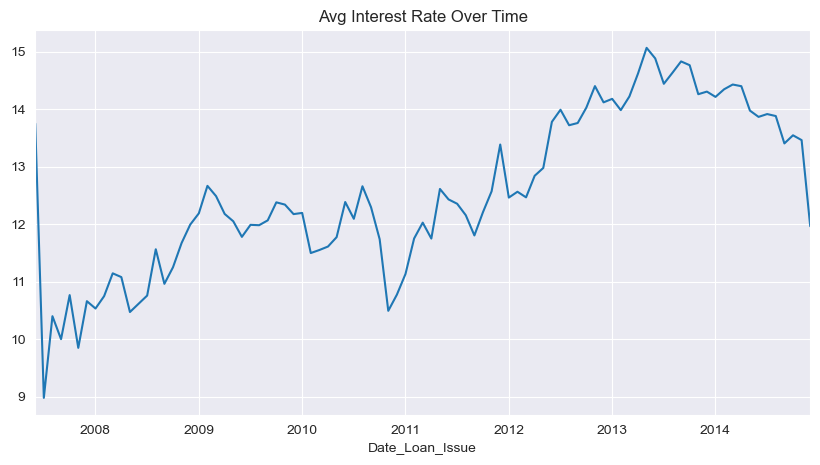

In [1221]:
import matplotlib.pyplot as plt

df['Date_Loan_Issue'] = df['Date_Loan_Issue'].apply(fix_date_format)
# df['Date_Loan_Issue'] = pd.to_datetime(df['Date_Loan_Issue'], format='%b-%y', errors='coerce')  # Ensure it's a datetime type
df.set_index('Date_Loan_Issue')['Interest_Rate'].resample('ME').mean().plot(figsize=(10,5), title="Avg Interest Rate Over Time")
plt.show()


In [1222]:
latest_date = df['Date_Loan_Issue'].max()
loan_age_reference = pd.to_datetime(latest_date)

# Fill NAs with median
df['Date_Loan_Issue'] = df['Date_Loan_Issue'].fillna(df['Date_Loan_Issue'].median())

df['Loan_Age'] = (loan_age_reference - df['Date_Loan_Issue']).dt.days / 365
df.drop(columns=['Date_Loan_Issue'], inplace=True)
# print(loan_age_reference)

print(df.isnull().sum())

Interest_Rate                   0
Loan_Funded                     0
Number_of_Payments              0
Home_Ownership              51960
Debt Ratio                      0
Credit_Lines_Open               0
Derogatory_PRs                  0
Total_credit                    0
Utilization_Rate                0
Credit_Lines_Total              0
Credit_Delinquencies_log        0
Credit_Inquiries_rcp            0
Loan_Subgrade_ordinal           0
Loan_Status_binary              0
Credit_Age                      0
Loan_Age                        0
dtype: int64


In [1223]:
df['Loan_Age'].describe()

count    338990.000000
mean          1.430160
std           1.140998
min           0.000000
25%           0.586301
50%           1.082192
75%           1.915068
max           7.506849
Name: Loan_Age, dtype: float64

In [1224]:
# Messy data
df = df.drop(['Home_Ownership'], axis=1)

In [1225]:
df.head()


,Interest_Rate,Loan_Funded,Number_of_Payments,Debt Ratio,Credit_Lines_Open,Derogatory_PRs,Total_credit,Utilization_Rate,Credit_Lines_Total,Credit_Delinquencies_log,Credit_Inquiries_rcp,Loan_Subgrade_ordinal,Loan_Status_binary,Credit_Age,Loan_Age
0,11.89,25000.0,36.0,19.48,10.0,0.0,28854.0,52.1,42.0,0.0,1.0,8,0,17.591781,5.336986
1,10.71,7000.0,36.0,14.29,7.0,0.0,33623.0,76.7,7.0,0.0,1.0,9,0,10.923288,6.589041
2,16.99,25000.0,36.0,10.50,10.0,0.0,19878.0,66.3,17.0,0.0,1.0,17,0,11.257534,0.334247
3,13.11,1200.0,36.0,5.47,5.0,0.0,2584.0,40.4,31.0,0.0,1.0,11,0,26.682192,4.756164
4,13.57,10800.0,36.0,11.63,14.0,0.0,3511.0,25.6,40.0,0.0,0.5,12,0,14.758904,5.084932


In [1226]:
print(df.isnull().sum())

Interest_Rate               0
Loan_Funded                 0
Number_of_Payments          0
Debt Ratio                  0
Credit_Lines_Open           0
Derogatory_PRs              0
Total_credit                0
Utilization_Rate            0
Credit_Lines_Total          0
Credit_Delinquencies_log    0
Credit_Inquiries_rcp        0
Loan_Subgrade_ordinal       0
Loan_Status_binary          0
Credit_Age                  0
Loan_Age                    0
dtype: int64


# Model Training

Note: We were limited to the use of Linear Regression and Random Forest Regressor as our potential models.

In [1227]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [1228]:
X = df.drop(columns=['Interest_Rate'])
y = df['Interest_Rate']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scaler
scaler = StandardScaler()
# Fit on training data, transform both train & test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform (not fit_transform) on test data!

In [1229]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression R²: {lr_r2:.2f}")


Linear Regression RMSE: 2.60
Linear Regression R²: 0.65


In [1230]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")


Random Forest RMSE: 1.21
Random Forest R²: 0.92


In [1231]:
df.shape

(338990, 15)

In [1232]:
df[df.isna().any(axis=1)]


,Interest_Rate,Loan_Funded,Number_of_Payments,Debt Ratio,Credit_Lines_Open,Derogatory_PRs,Total_credit,Utilization_Rate,Credit_Lines_Total,Credit_Delinquencies_log,Credit_Inquiries_rcp,Loan_Subgrade_ordinal,Loan_Status_binary,Credit_Age,Loan_Age


# Evaluation

In [1233]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation with R² score (regression task)
cv_scores_r2 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of R² scores
print(f"Cross-validation R²: {cv_scores_r2.mean():.4f} ± {cv_scores_r2.std():.4f}")

# Alternatively, you can use 'neg_mean_squared_error' to get MSE or RMSE
cv_scores_mse = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of MSE
print(f"Cross-validation MSE: {-cv_scores_mse.mean():.4f} ± {cv_scores_mse.std():.4f}")


Cross-validation R²: 0.9225 ± 0.0009
Cross-validation MSE: 1.4835 ± 0.0247


# Model application to test data

In [1234]:
holdout_data = pd.read_csv('Assignment_3/Loan_Prediction/Holdout for Testing.csv', low_memory=False)

# print(holdout_data.head())

## Data Preprocessing

In [1235]:
holdout_data.columns = ['Interest_Rate', 'Loan_ID', 'Borrower_ID', 'Loan_Requested', 'Loan_Funded', 'Investor_Portion',
              'Number_of_Payments', 'Loan_Grade', 'Loan_Subgrade', 'Job_Info', 'Years_Employed', 'Home_Ownership',
              'Annual_Income', 'Income_Verified', 'Date_Loan_Issue', 'Loan_Reason_Borrower', 'Loan_Category_Borrower',
              'Loan_Title_Borrower', 'Zip_3', 'State', 'Debt Ratio', 'Credit_Delinquencies', 'Date_Earliest_Credit',
              'Creditor_Inquiries_6_months', 'Months_Last_Delinquency', 'Months_Last_PR', 'Credit_Lines_Open',
              'Derogatory_PRs', 'Total_credit', 'Utilization_Rate', 'Credit_Lines_Total', 'Loan_Status']
# holdout_data.shape

In [1237]:
# Drop columns
holdout_data = holdout_data.drop(['Loan_ID', 'Borrower_ID', 'Job_Info', 'Loan_Reason_Borrower', 'Loan_Category_Borrower', 'Loan_Title_Borrower', 'Zip_3', 'State'], axis=1)

In [1239]:
# Remove '$' and ',' from the relevant columns
holdout_data[['Loan_Requested', 'Loan_Funded', 'Investor_Portion']] = holdout_data[['Loan_Requested', 'Loan_Funded', 'Investor_Portion']] \
    .apply(lambda x: x.astype(str).str.replace('$', '').str.replace(',', ''))

# Convert each column to numeric, handling errors with 'coerce'
holdout_data[['Loan_Requested', 'Loan_Funded', 'Investor_Portion']] = holdout_data[['Loan_Requested', 'Loan_Funded', 'Investor_Portion']].apply(pd.to_numeric, errors='coerce')

# Remove months
holdout_data['Number_of_Payments'] = pd.to_numeric(holdout_data['Number_of_Payments'].astype(str).str.rstrip(' months'), errors='coerce')

holdout_data['Years_Employed'] = pd.to_numeric(holdout_data['Years_Employed'].astype(str).str.replace(r'\D', '', regex=True), errors='coerce')

holdout_data['Utilization_Rate'] = pd.to_numeric(holdout_data['Utilization_Rate'].astype(str).str.rstrip('%'), errors='coerce')

In [1240]:
# Loan Requested and Loan Funded are the same, drop one
holdout_data = holdout_data.drop(['Loan_Requested'], axis=1)
# Fill NAs with median
holdout_data['Loan_Funded'] = holdout_data['Loan_Funded'].fillna(holdout_data['Loan_Funded'].median())
# Drop one since redundant with Loan Funded as well
holdout_data = holdout_data.drop(['Investor_Portion'], axis=1)
# Impute Number of Payments based on Loan Funded
holdout_data.loc[holdout_data['Loan_Funded'] < 15000, 'Number_of_Payments'] = holdout_data['Number_of_Payments'].fillna(36)
holdout_data.loc[holdout_data['Loan_Funded'] >= 15000, 'Number_of_Payments'] = holdout_data['Number_of_Payments'].fillna(60)

# Drop... skewed for 10+ years employed, interest rates seem even between years
holdout_data = holdout_data.drop(['Years_Employed'], axis=1)
# Debt ratio should be correlated with Annual Income since divided by and has a better distribution than Annual Income
holdout_data = holdout_data.drop(['Annual_Income'], axis=1)
# Fill NAs with median
holdout_data['Debt Ratio'] = holdout_data['Debt Ratio'].fillna(holdout_data['Debt Ratio'].median())

In [1241]:
# MOSTLY ZEROS
holdout_data['Credit_Delinquencies'] = holdout_data['Credit_Delinquencies'].fillna(0)
# Log(x+1) transformation
holdout_data['Credit_Delinquencies_log'] = np.log1p(holdout_data['Credit_Delinquencies'])
holdout_data = holdout_data.drop(['Credit_Delinquencies'], axis=1)

# MOSTLY ZEROS
holdout_data['Creditor_Inquiries_6_months'] = holdout_data['Creditor_Inquiries_6_months'].fillna(0)
# Reciprocal transformation + 1
holdout_data['Credit_Inquiries_rcp'] = 1 / (holdout_data['Creditor_Inquiries_6_months'] + 1)
holdout_data = holdout_data.drop(['Creditor_Inquiries_6_months'], axis=1)

In [1242]:
# A lot of missing values, lets drop Months since Last Delinquency
# # Info may be captured elsewhere in the data
# # same with next Months since Last Public Record
holdout_data = holdout_data.drop(['Months_Last_Delinquency'], axis=1)
holdout_data = holdout_data.drop(['Months_Last_PR'], axis=1)

In [1243]:
# Fill NAs with median
holdout_data['Credit_Lines_Open'] = holdout_data['Credit_Lines_Open'].fillna(holdout_data['Credit_Lines_Open'].median())

Clip for outliers

In [1244]:
# MOSTLY ZEROS
holdout_data['Derogatory_PRs'] = holdout_data['Derogatory_PRs'].fillna(0)
# upper_percentile_DPR = df['Derogatory_PRs'].quantile(0.99)  # 99th percentile
# Clip instead of remove
# USE UPPER BOUND FROM TRAIN SET
holdout_data["Derogatory_PRs"] = np.clip(holdout_data["Derogatory_PRs"], None, upper_percentile_DPR)

In [1245]:
# Fill NAs with median
holdout_data['Total_credit'] = holdout_data['Total_credit'].fillna(holdout_data['Total_credit'].median())
# upper_percentile_TC = df['Total_credit'].quantile(0.99)  # 99th percentile
# Clip instead of remove
# USE UPPER BOUND FROM TRAIN SET
holdout_data["Total_credit"] = np.clip(holdout_data["Total_credit"], None, upper_percentile_TC)

In [1246]:
# Fill NAs with median
holdout_data["Utilization_Rate"] = holdout_data["Utilization_Rate"].fillna(holdout_data["Utilization_Rate"].median())
# upper_percentile_UR = df['Utilization_Rate'].quantile(0.99)
# Clip instead of remove
# USE UPPER BOUND FROM TRAIN SET
holdout_data["Utilization_Rate"] = holdout_data["Utilization_Rate"].fillna(holdout_data["Utilization_Rate"].median())
holdout_data["Utilization_Rate"] = np.clip(holdout_data["Utilization_Rate"], None, upper_percentile_UR)

In [1247]:
# Fill NAs with median
holdout_data['Credit_Lines_Total'] = holdout_data['Credit_Lines_Total'].fillna(holdout_data['Credit_Lines_Total'].median())

Fix categorical data

In [1248]:
# subgrade_order = [f"{grade}{num}" for grade in "ABCDEFG" for num in range(1, 6)]  # ['A1', 'A2', ..., 'G5']
# Convert to categorical and encode
holdout_data['Loan_Subgrade_ordinal'] = pd.Categorical(holdout_data['Loan_Subgrade'], categories=subgrade_order, ordered=True).codes
# Drop loan grade and loan subgrade
holdout_data = holdout_data.drop(['Loan_Subgrade'], axis=1)
holdout_data = holdout_data.drop(['Loan_Grade'], axis=1)

In [1249]:
# Messy data
holdout_data = holdout_data.drop(['Income_Verified'], axis=1)
holdout_data = holdout_data.drop(['Home_Ownership'], axis=1)

In [1250]:
# Convert to binary
holdout_data['Loan_Status_binary'] = (holdout_data['Loan_Status'] == 'w').astype(int)
holdout_data = holdout_data.drop(['Loan_Status'], axis=1)

In [1251]:
# Apply fix_date_format function to the column
holdout_data['Date_Earliest_Credit'] = holdout_data['Date_Earliest_Credit'].apply(fix_date_format)

In [1252]:
# Apply function to the column
holdout_data['Date_Loan_Issue'] = holdout_data['Date_Loan_Issue'].apply(fix_date_format)

In [1253]:
# Create Credit Age column
# Use reference from NEW data
# holdout_data['Date_Earliest_Credit'] = pd.to_datetime(holdout_data['Date_Earliest_Credit'], format='%b-%y', errors='coerce')
credit_age_reference = holdout_data['Date_Earliest_Credit'].max()
# Fill NAs with median
holdout_data['Date_Earliest_Credit'] = holdout_data['Date_Earliest_Credit'].fillna(holdout_data['Date_Earliest_Credit'].median())
holdout_data['Credit_Age'] = (credit_age_reference - holdout_data['Date_Earliest_Credit']).dt.days / 365
holdout_data.drop(columns=['Date_Earliest_Credit'], inplace=True)

# Create Loan Age column
# Use reference from NEW data
 #holdout_data['Date_Loan_Issue'] = pd.to_datetime(holdout_data['Date_Loan_Issue'], format='%b-%y', errors='coerce')
loan_age_reference = holdout_data['Date_Loan_Issue'].max()
# Fill NAs with median
holdout_data['Date_Loan_Issue'] = holdout_data['Date_Loan_Issue'].fillna(holdout_data['Date_Loan_Issue'].median())
holdout_data['Loan_Age'] = (loan_age_reference - holdout_data['Date_Loan_Issue']).dt.days / 365
holdout_data.drop(columns=['Date_Loan_Issue'], inplace=True)



In [1254]:
holdout_data.head()

,Interest_Rate,Loan_Funded,Number_of_Payments,Debt Ratio,Credit_Lines_Open,Derogatory_PRs,Total_credit,Utilization_Rate,Credit_Lines_Total,Credit_Delinquencies_log,Credit_Inquiries_rcp,Loan_Subgrade_ordinal,Loan_Status_binary,Credit_Age,Loan_Age
0,NaN,6000,36,28.31,18,0,19861.0,64.5,33,0.0,0.5,14,0,9.257534,0.0
1,NaN,24000,36,16.03,12,0,17001.0,26.2,36,0.0,0.5,0,1,43.197260,0.0
2,NaN,35000,36,32.49,16,0,25797.0,49.9,33,0.0,1.0,11,1,13.345205,0.0
3,NaN,10000,60,32.96,13,1,9586.0,43.8,21,0.0,0.5,15,1,13.008219,0.0
4,NaN,24000,60,31.03,27,0,31842.0,41.3,43,0.0,1.0,5,1,9.175342,0.0


In [1255]:
holdout_data.shape

(80000, 15)

In [1256]:
X_testset=holdout_data
X_testset= X_testset.drop('Interest_Rate', axis=1)
X_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_Funded               80000 non-null  int64  
 1   Number_of_Payments        80000 non-null  int64  
 2   Debt Ratio                80000 non-null  float64
 3   Credit_Lines_Open         80000 non-null  int64  
 4   Derogatory_PRs            80000 non-null  int64  
 5   Total_credit              80000 non-null  float64
 6   Utilization_Rate          80000 non-null  float64
 7   Credit_Lines_Total        80000 non-null  int64  
 8   Credit_Delinquencies_log  80000 non-null  float64
 9   Credit_Inquiries_rcp      80000 non-null  float64
 10  Loan_Subgrade_ordinal     80000 non-null  int8   
 11  Loan_Status_binary        80000 non-null  int64  
 12  Credit_Age                80000 non-null  float64
 13  Loan_Age                  80000 non-null  float64
dtypes: flo

## Scale & Predict

In [1257]:
# Scale Data
X_testset_scaled= scaler.fit_transform(X_testset)

In [1258]:
# Predict on Holdout set
test_predictions = rf_model.predict(X_testset_scaled)

In [1259]:
test = pd.read_csv('Assignment_3/Loan_Prediction/Holdout for Testing.csv', low_memory=False)

predict = pd.DataFrame({
    "X1": test_predictions,
    "X2": test["X2"]
})

# Save the updated dataframe to CSV
predict.to_csv("Results from anasyquia.csv", index=True)


array([[<Axes: title={'center': 'Interest_Rate_Predicted'}>]],
      dtype=object)

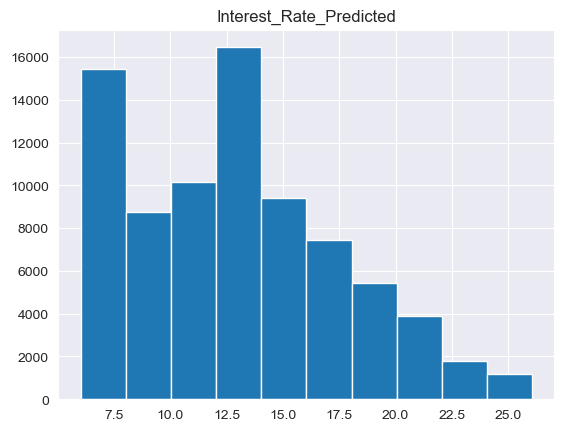

In [1260]:
# Visualize predictions
predictions_df.hist()


In [1267]:
# New Interest Rate Distribution
print(predictions_df.describe())

       Interest_Rate_Predicted
count             80000.000000
mean                 13.014291
std                   4.642966
min                   6.030000
25%                   9.549400
50%                  12.756000
75%                  16.024000
max                  26.060000


In [1268]:
# Original Distribution for comparison
print(df['Interest_Rate'].describe())

count    338990.000000
mean         13.946271
std           4.377951
min           5.420000
25%          10.990000
50%          13.680000
75%          16.780000
max          26.060000
Name: Interest_Rate, dtype: float64
